In [1]:
import numpy as np
from scipy.special import expit as sigmoid
from scipy.special import softmax as sm
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from math import sqrt
from math import log

class NeuralNet:
    def __init__(self, num_features, num_hidden1,num_hidden2,num_hidden3,num_hidden4,num_hidden5,num_hidden6 ,alpha, max_epochs, num_output, _EPSILON,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6):
        super().__init__()
        self.num_features=num_features  # number of input nodes (features)
        self.num_hidden1=num_hidden1  # number of hidden nodes for 1st hidden layer
        self.num_hidden2=num_hidden2  # number of hidden nodes for 2nd hidden layer
        self.num_hidden3=num_hidden3  # number of hidden nodes for 3rd hidden layer
        self.num_hidden4=num_hidden4  # number of hidden nodes for 4th hidden layer
        self.num_hidden5=num_hidden5  # number of hidden nodes for 5th hidden layer
        self.num_hidden6=num_hidden6  # number of hidden nodes for 6th hidden layer
        self.alpha=alpha  # learning rate
        self.max_epochs=max_epochs # maximum number of epochs
        self.num_output=num_output # number of output nodes
        self._EPSILON=_EPSILON
        self.alpha1=alpha1
        self.alpha2=alpha2
        self.alpha3=alpha3
        self.alpha4=alpha4
        self.alpha5=alpha5
        self.alpha6=alpha6
        self.loss = [] #list to store losses per 100 epochs 
        self.trainingaccur=[] # list to store training accuracy per 100 epochs 
        self.devaccur=[]
        self.Weights_Input_to_H1=np.random.randn(self.num_hidden1, self.num_features)*(0.1)
        self.Bias_Input_to_H1=np.zeros([self.num_hidden1,1])
        self.Weights_H1_to_H2=np.random.randn(self.num_hidden2, self.num_hidden1)*(0.1)
        self.Bias_H1_to_H2=np.zeros([self.num_hidden2,1])
        self.Weights_H2_to_H3=np.random.randn(self.num_hidden3, self.num_hidden2)*(0.1)
        self.Bias_H2_to_H3=np.zeros([self.num_hidden3,1])
        self.Weights_H3_to_H4=np.random.randn(self.num_hidden4, self.num_hidden3)*(0.1)
        self.Bias_H3_to_H4=np.zeros([self.num_hidden4,1])
        self.Weights_H4_to_H5=np.random.randn(self.num_hidden5, self.num_hidden4)*(0.1)
        self.Bias_H4_to_H5=np.zeros([self.num_hidden5,1])
        self.Weights_H5_to_H6=np.random.randn(self.num_hidden6, self.num_hidden5)*(0.1)
        self.Bias_H5_to_H6=np.zeros([self.num_hidden6,1])
        self.Weights_H6_to_output=np.random.randn(self.num_output, self.num_hidden6)*(0.1)
        self.Bias_H6_to_output=np.zeros([self.num_output,1])
        self.dWeights_Input_to_H1=np.zeros([self.num_hidden1, self.num_features])
        self.dBias_Input_to_H1=np.zeros([self.num_hidden1,1])
        self.dWeights_H1_to_H2=np.zeros([self.num_hidden2, self.num_hidden1])
        self.dBias_H1_to_H2=np.zeros([self.num_hidden2,1])
        self.dWeights_H2_to_H3=np.zeros([self.num_hidden3, self.num_hidden2])
        self.dBias_H2_to_H3=np.zeros([self.num_hidden3,1])
        self.dWeights_H3_to_H4=np.zeros([self.num_hidden4, self.num_hidden3])
        self.dBias_H3_to_H4=np.zeros([self.num_hidden4,1])
        self.dWeights_H4_to_H5=np.zeros([self.num_hidden5, self.num_hidden4])
        self.dBias_H4_to_H5=np.zeros([self.num_hidden5,1])
        self.dWeights_H5_to_H6=np.zeros([self.num_hidden6, self.num_hidden5])
        self.dBias_H5_to_H6=np.zeros([self.num_hidden6,1])
        self.dWeights_H6_to_output=np.zeros([self.num_output, self.num_hidden6])
        self.dBias_H6_to_output=np.zeros([self.num_output,1])

        
        

        
    
    def relU(self,X):
        return np.maximum(X,0)

    def leakreLU(self,X,alpha):
        return np.maximum(X,alpha*X)
      
    
    def deriv(self,X):
        return np.where(X<=0,0,1)

    def deriv_alpha(self,alpha,X):
        return np.where(X<=0,X,0)
    
    def deriv_z(self,X,alpha):
        return np.where(X<=0,alpha,1)  
        


    
    def softmax(self,x):
        e=np.exp(x)
        for i in range(e.shape[1]):
            e[:,i]=e[:,i]/np.sum(e[:,i])
        return e

    
    

    
        
    # TODO: complete implementation for forward pass
    def forward(self, X):
        self.z1=np.dot((self.Weights_Input_to_H1),(X))+self.Bias_Input_to_H1
        self.a1=self.leakreLU(self.z1,self.alpha1)
        self.z2=np.dot((self.Weights_H1_to_H2),(self.a1))+self.Bias_H1_to_H2
        self.a2=self.leakreLU(self.z2,self.alpha2)
        self.z3=np.dot((self.Weights_H2_to_H3),(self.a2))+self.Bias_H2_to_H3
        self.a3=self.leakreLU(self.z3,self.alpha3)
        self.z4=np.dot((self.Weights_H3_to_H4),(self.a3))+self.Bias_H3_to_H4
        self.a4=self.leakreLU(self.z4,self.alpha4)
        self.z5=np.dot((self.Weights_H4_to_H5),(self.a4))+self.Bias_H4_to_H5
        self.a5=self.leakreLU(self.z5,self.alpha5)
        self.z6=np.dot((self.Weights_H5_to_H6),(self.a5))+self.Bias_H5_to_H6
        self.a6=self.leakreLU(self.z6,self.alpha6)
        self.z7=np.dot((self.Weights_H6_to_output),(self.a6))+self.Bias_H6_to_output
        self.a7=self.softmax((self.z7))
        return self.a7
        
        
        
    
    # TODO: complete implementation for backpropagation
    # the following Numpy functions may be useful: np.dot, np.sum, np.tanh, numpy.ndarray.T
    def backprop(self, X, t):

        self.dz7=(self.a7.reshape(self.num_output,-1)-t.reshape(self.num_output,-1))/((self.num_output)*(X.shape[1]))
        self.dBias_H6_to_output=np.sum(self.dz7,axis=1,keepdims=True)
        self.dWeights_H6_to_output=np.dot((self.dz7),self.a6.T)
        self.dz6=(np.dot(self.Weights_H6_to_output.T,self.dz7))* (self.deriv_z(self.z6,self.alpha6))
        self.dBias_H5_to_H6=np.sum(self.dz6,axis=1,keepdims=True)
        self.dWeights_H5_to_H6=np.dot((self.dz6),(self.a5.T))
        self.dalpha6=np.sum((np.dot(self.Weights_H6_to_output.T,self.dz7)) * (self.deriv_alpha(self.alpha6,self.z6)))
        self.dz5=(np.dot(self.Weights_H5_to_H6.T,self.dz6)) * (self.deriv_z(self.z5,self.alpha5))
        self.dBias_H4_to_H5=np.sum(self.dz5,axis=1,keepdims=True)
        self.dWeights_H4_to_H5=np.dot((self.dz5),(self.a4.T))
        self.dalpha5=np.sum((np.dot(self.Weights_H5_to_H6.T,self.dz6)) * (self.deriv_alpha(self.alpha5,self.z5)))
        self.dz4=(np.dot(self.Weights_H4_to_H5.T,self.dz5)) * (self.deriv_z(self.z4,self.alpha4))
        self.dBias_H3_to_H4=np.sum(self.dz4,axis=1,keepdims=True)
        self.dWeights_H3_to_H4=np.dot((self.dz4),(self.a3.T))
        self.dalpha4=np.sum((np.dot(self.Weights_H4_to_H5.T,self.dz5)) * (self.deriv_alpha(self.alpha4,self.z4)))
        self.dz3=(np.dot(self.Weights_H4_to_H5.T,self.dz4)) * (self.deriv_z(self.z3,self.alpha3))
        self.dBias_H2_to_H3=np.sum(self.dz3,axis=1,keepdims=True)
        self.dWeights_H2_to_H3=np.dot((self.dz3),(self.a2.T))
        self.dalpha3=np.sum((np.dot(self.Weights_H3_to_H4.T,self.dz4)) * (self.deriv_alpha(self.alpha3,self.z3)))
        self.dz2=(np.dot(self.Weights_H3_to_H4.T,self.dz3)) * (self.deriv_z(self.z2,self.alpha2))
        self.dBias_H1_to_H2=np.sum(self.dz2,axis=1,keepdims=True)
        self.dWeights_H1_to_H2=np.dot((self.dz2),(self.a1.T))
        self.dalpha2=np.sum((np.dot(self.Weights_H2_to_H3.T,self.dz3)) * (self.deriv_alpha(self.alpha2,self.z2)))
        self.dz1=(np.dot(self.Weights_H1_to_H2.T,self.dz2)) * (self.deriv_z(self.z1,self.alpha1))
        self.dBias_Input_to_H1=np.sum(self.dz1,axis=1,keepdims=True)
        self.dWeights_Input_to_H1=np.dot((self.dz1),X.T)
        self.dalpha1=np.sum((np.dot(self.Weights_H1_to_H2.T,self.dz2)) * (self.deriv_alpha(self.alpha1,self.z1)))
        
        
        
        
        
            
                
                
                
              
                        
                
      
        
        
    
    #TODO: complete implementation for fitting data, and change the existing code if needed
    def fit(self, x_train_data, y_train_data,x_dev_data,y_dev_data):
       
        
        
        for step in range(self.max_epochs):
            self.forward(x_train_data)
            self.backprop(x_train_data, y_train_data)
            self.Bias_H6_to_output=self.Bias_H6_to_output-((self.alpha)*(self.dBias_H6_to_output))
            self.Weights_H6_to_output=self.Weights_H6_to_output-((self.alpha)*(self.dWeights_H6_to_output))
            self.Bias_H5_to_H6=self.Bias_H5_to_H6-((self.alpha)*(self.dBias_H5_to_H6))
            self.Weights_H5_to_H6=self.Weights_H5_to_H6-((self.alpha)*(self.dWeights_H5_to_H6))
            self.Bias_H4_to_H5=self.Bias_H4_to_H5-((self.alpha)*(self.dBias_H4_to_H5))
            self.Weights_H4_to_H5=self.Weights_H4_to_H5-((self.alpha)*(self.dWeights_H4_to_H5))
            self.Bias_H3_to_H4=self.Bias_H3_to_H4-((self.alpha)*(self.dBias_H3_to_H4))
            self.Weights_H3_to_H4=self.Weights_H3_to_H4-((self.alpha)*(self.dWeights_H3_to_H4))
            self.Bias_H2_to_H3=self.Bias_H2_to_H3-((self.alpha)*(self.dBias_H2_to_H3))
            self.Weights_H2_to_H3=self.Weights_H2_to_H3-((self.alpha)*(self.dWeights_H2_to_H3))
            self.Bias_H1_to_H2=self.Bias_H1_to_H2-((self.alpha)*(self.dBias_H1_to_H2))
            self.Weights_H1_to_H2=self.Weights_H1_to_H2-((self.alpha)*(self.dWeights_H1_to_H2))
            self.Bias_Input_to_H1=self.Bias_Input_to_H1-((self.alpha)*(self.dBias_Input_to_H1))
            self.Weights_Input_to_H1=self.Weights_Input_to_H1-((self.alpha)*(self.dWeights_Input_to_H1))
            self.alpha1=self.alpha1-((self.alpha)*(self.dalpha1))
            self.alpha2=self.alpha2-((self.alpha)*(self.dalpha2))
            self.alpha3=self.alpha3-((self.alpha)*(self.dalpha3))
            self.alpha4=self.alpha4-((self.alpha)*(self.dalpha4))
            self.alpha5=self.alpha5-((self.alpha)*(self.dalpha5))
            self.alpha6=self.alpha6-((self.alpha)*(self.dalpha6))
            
      

            if step % 100 == 0:
                self.CCloss=log_loss(np.transpose(y_train_data),np.transpose(self.a7),eps=self._EPSILON,normalize=True)
                self.trainingaccuracy=accuracy_score(np.argmax(y_train_data,axis=0),np.argmax(self.forward(x_train_data),axis=0))
                self.devaccuracy=accuracy_score(np.argmax(y_dev_data,axis=0),np.argmax(self.forward(x_dev_data),axis=0))
                print(f'step: {step},  loss: {self.CCloss:3.150f}') 
                print(accuracy_score(np.argmax(y_train_data,axis=0),np.argmax(self.forward(x_train_data),axis=0)))
                print(accuracy_score(np.argmax(y_dev_data,axis=0),np.argmax(self.forward(x_dev_data),axis=0)))
                self.loss.append(self.CCloss)
                self.trainingaccur.append(self.trainingaccuracy)
                self.devaccur.append(self.devaccuracy)
                print(NN.alpha1,NN.dalpha1)
                print(NN.alpha2,NN.dalpha2)
                print(NN.alpha3,NN.dalpha3)
                print(NN.alpha4,NN.dalpha4)
                print(NN.alpha5,NN.dalpha5)
                print(NN.alpha6,NN.dalpha6)
               
                
            

                
              
            
            
    def predict(self,X,y=None):
        self.forward(X)
        if(self.num_output>1):
            y_hat=np.argmax(self.a7, axis=0)
            temp=accuracy_score(y_hat,y)
        else:
            y_hat=np.where(self.a7>0.5,1,0)
            temp=accuracy_score(y_hat,y)
        return temp,y_hat

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


# import some data to play with
mnist = load_digits()
X=mnist.data
Y=mnist.target

In [4]:
X.shape,Y.shape

((1797, 64), (1797,))

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size=0.11)


In [6]:
import sklearn as sk
scaler=sk.preprocessing.MinMaxScaler()

In [7]:
for a in range(X_train.shape[1]):
  X_train[:,a]=scaler.fit_transform(X_train[:,a].reshape(-1, 1)).flatten()


In [8]:
Y_train=np.array(pd.get_dummies(np.array(Y_train)))
Y_dev=np.array(pd.get_dummies(np.array(Y_dev)))

In [9]:
X_train=np.transpose(X_train)
X_dev=np.transpose(X_dev)
Y_train=np.transpose(Y_train)
Y_dev=np.transpose(Y_dev)

In [27]:
numHidden1 = 500 # number of hidden nodes
numHidden2 = 500# number of hidden nodes
numHidden3 = 500# number of hidden nodes
numHidden4 = 500# number of hidden nodes
numHidden5 = 500# number of hidden nodes
numHidden6 = 500# number of hidden nodes
num_features = X_train.shape[0]
numOutput = Y_train.shape[0]
max_epoches = 1000000
alpha = 0.01
epsilon=0.00000000001
alpha1=-0.594
alpha2=-0.018
alpha3=-0.057
alpha4=0.023
alpha5=1.047
alpha6=-1.185
NN = NeuralNet(num_features, numHidden1,numHidden2,numHidden3,numHidden4,numHidden5,numHidden6, alpha, max_epoches, numOutput,epsilon,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6)

In [ ]:
NN.fit(X_train,Y_train,X_dev,Y_dev)

step: 0,  loss: 15.883017197629628824984138191211968660354614257812500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0.11952744961779013
0.10674157303370786
-0.5930223681420409 -0.09776318579590969
-0.001896661356365091 -1.6103338643634908
-0.059707259804669954 0.2707259804669953
-0.0006456552126692071 2.3645655212669205
1.0319514376952483 1.504856230475171
-1.1768557346231172 -0.8144265376882915
step: 100,  loss: 0.385171986294823021079736236060853116214275360107421875000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0.8978457261987491
0.8764044943820225
-0.6914324720911392 0.05445155984060201
0.011824242131892886 -8.392019406940033e-05
-0.03974504841469752 -0.0032436320592886423
-0.001909491039894488 0.0048714700525617815
0.97555528559278 0.00559960044235117
-1.1169844666644169 -0.0064028871355961674


In [21]:
 print(NN.alpha1,NN.dalpha1)
 print(NN.alpha2,NN.dalpha2)
 print(NN.alpha3,NN.dalpha3)
 print(NN.alpha4,NN.dalpha4)
 print(NN.alpha5,NN.dalpha5)
 print(NN.alpha6,NN.dalpha6)

-0.8426945206385054 0.001516926938830526
0.014051644188483968 0.00040342330254072135
-0.009157486406513404 -0.00025147178439890224
0.004191040875166622 0.00016650839283454275
0.9904545207566833 -0.0006723012741595146
-1.1498908052073187 0.0007589605486281406


In [ ]:
NN.alpha=0.1

In [23]:
accuracy_score((Y_test),np.argmax(NN.forward(X_test.T),axis=0))

0.9222222222222223

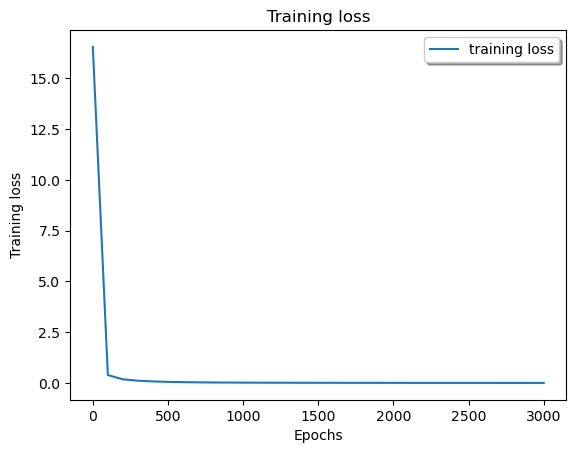

In [24]:
import matplotlib.pyplot as plt
x_loss=range(0,len(NN.loss)*100,100)


line1=plt.plot(x_loss,NN.loss,linestyle='-',label='training loss')  

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
legend = plt.legend(loc='best', shadow=True)

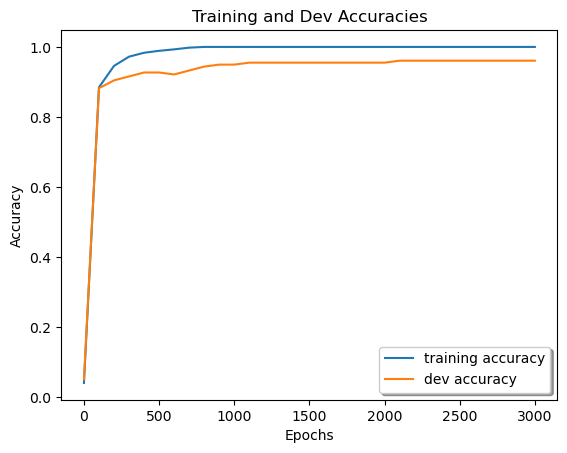

In [25]:
x_training_accur=range(0,len(NN.trainingaccur)*100,100)
x_devaccur=range(0,len(NN.devaccur)*100,100)

line1=plt.plot(x_training_accur,NN.trainingaccur,linestyle='-',label='training accuracy') 
line2=plt.plot(x_devaccur,NN.devaccur,linestyle='-',label='dev accuracy')
                              
plt.title('Training and Dev Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
legend = plt.legend(loc='best', shadow=True)

In [ ]:
NN.dalpha1=(((np.dot(NN.Weights_H1_to_H2.T,NN.dz2))*(NN.deriv_alpha(NN.z1))))

In [ ]:
NN.dalpha1[0][9]

In [26]:
 print(NN.alpha1,NN.dalpha1)
 print(NN.alpha2,NN.dalpha2)
 print(NN.alpha3,NN.dalpha3)
 print(NN.alpha4,NN.dalpha4)
 print(NN.alpha5,NN.dalpha5)
 print(NN.alpha6,NN.dalpha6)

-0.8426945206385054 0.001516926938830526
0.014051644188483968 0.00040342330254072135
-0.009157486406513404 -0.00025147178439890224
0.004191040875166622 0.00016650839283454275
0.9904545207566833 -0.0006723012741595146
-1.1498908052073187 0.0007589605486281406


In [22]:
 print(NN.alpha1,NN.dalpha1)
 print(NN.alpha2,NN.dalpha2)
 print(NN.alpha3,NN.dalpha3)
 print(NN.alpha4,NN.dalpha4)
 print(NN.alpha5,NN.dalpha5)
 print(NN.alpha6,NN.dalpha6)

-0.8426945206385054 0.001516926938830526
0.014051644188483968 0.00040342330254072135
-0.009157486406513404 -0.00025147178439890224
0.004191040875166622 0.00016650839283454275
0.9904545207566833 -0.0006723012741595146
-1.1498908052073187 0.0007589605486281406
